# How Does a Bike-Share Navigate Speedy Success?

Bellabeat, a successful enterprise specializing in cutting-edge health-oriented products designed for women, is committed to expanding its presence in the global smart device market. Urška Sršen, the Co-founder and Chief Creative Officer, envisions leveraging fitness data from various smart devices to open new avenues for Bellabeat's growth. In line with this vision, the marketing analytics team has been assigned the task of scrutinizing usage data of smart devices to gain valuable insights into the current utilization of these advanced technologies.

# Framework


### Stakeholders

* Urška Sršen, Co-founder and Chief Creative Officer of Bellabeat
* Sando Mur, Mathematician and Co-founder of Bellabeat
* Bellabeat marketing analytics team
* Bellabeat executive team

### Objective

Uncover growth opportunities for Bellabeat in the global smart device market through a comprehensive analysis of smart device usage data and prevailing consumer behavior patterns. The aim is to gain insights into consumer behavior and usage patterns, informing marketing strategy and propelling business expansion.

### Tasks

Analyze smart device usage data for Fitbit.
Identify patterns and trends in customer behavior based on the usage data.
Present findings to the Bellabeat executive team.
Provide high-level recommendations for marketing strategies based on the discovered insights.

### Questions for this Analysis

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

# FitBit Fitness Tracker Metadata

### Dataset

The data used for this analysis comprises FitBit Fitness Tracker Data, available on Kaggle via Mobius. The dataset was collected through a distributed survey conducted on Amazon Mechanical Turk from December 3 to December 5, 2016. This survey involved participants providing primary data related to their fitness activities, contributing to the comprehensive dataset used in this study.

### Accessibility and Privacy

The data is licensed under CC0: Public Domain, relinquishing all rights globally under copyright law. Users are free to copy, modify, distribute, and perform the work, even for commercial purposes, without seeking permission.

### Organization and Verification

Comprising 18 files (15 in long format, 3 in wide format), the dataset encompasses diverse metrics such as activity, calories, sleep records, METs, heart rate, and steps. The information is organized in timeframes ranging from seconds to days.

### Limitations of the Data

Several limitations should be considered, potentially impacting the analysis results:

* Limited demographic information and user characteristics.
* Small sample size
* Lack of long-term trends or changes in user behavior

# Loading R Libraries

In [1]:
library(tidyverse)
library(scales)
library(lubridate)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Importing Dataset 

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Exploring Dataset

In [3]:
# Using dim() function to see the dimensions of the data frame
dim(daily_activity)

[1] 940  15

We can see that the dataset has 940 rows and columns.

In [4]:
# Now lets use the conlnames() function to see the column names
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

So, the columns contain information about the intensity and duration of various physical activities, distances covered, and caloric expenditure.

In [5]:
# The first few rows of the data frame using head() function
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


After using the head function we can see the values assigned to each column.

Id: Identifier or unique reference for each record.

ActivityDate: Date of the recorded activity.

TotalSteps: Total number of steps taken.

TotalDistance: Total distance covered during the activity.

TrackerDistance: Distance tracked by a fitness tracker.

LoggedActivitiesDistance: Distance covered during logged activities.

VeryActiveDistance: Distance covered during very active activities.

ModeratelyActiveDistance: Distance covered during moderately active activities.

LightActiveDistance: Distance covered during light active activities.

SedentaryActiveDistance: Distance covered during sedentary activities.

VeryActiveMinutes: Total minutes spent in very active activities.

FairlyActiveMinutes: Total minutes spent in fairly active activities.

LightlyActiveMinutes: Total minutes spent in lightly active activities.

SedentaryMinutes: Total minutes spent in sedentary activities.

Calories: Total calories burned during the recorded activities.

# Cleaning the Dataset

The first step in the data cleaning process includes utilizing the str() function to inspect the data type assigned to each column, whether it is a numerical vector or a categorical vector.

In [6]:
str(daily_activity)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

After examing the data we can see that the "Id" column is formated as a numeric vector, but for the purpose of this analysis this should be formatted as a character vector because we do not want to use this column for mathmatical calculations in our analysis. In addition, to the "Id" column the "ActivityDate" should be formated from character vector to date vector. To finally deplay the changes using the str() function.

In [7]:
# Convert 'Id' to character
daily_activity$Id <- as.character(daily_activity$Id)

# Convert 'ActivityDate' to date
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format="%m/%d/%Y")

# Display the structure of the data frame after conversion
str(daily_activity)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : chr [1:940] "1503960366" "1503960366" "1503960366" "1503960366" ...
 $ ActivityDate            : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 16

Now that we have reformatted the data structure, let's rename our columns starting with the tolower() function that converts all column names to lowercase. This ensures uniformity in naming conventions and simplifies further data manipulation. Additionally, we create a mapping vector (names_mapping) to define the correspondence between the original and standardized column names. To finally apply the renaming based on the mapping vector to ensures that our columns are consistently and descriptively named, providing clarity for subsequent data analysis.

In [8]:
# Rename columns
colnames(daily_activity) <- tolower(colnames(daily_activity))

names_mapping <- c(
  "id" = "id",
  "activitydate" = "activity_date",
  "totalsteps" = "total_steps",
  "totaldistance" = "total_distance",
  "trackerdistance" = "tracker_distance",
  "loggedactivitiesdistance" = "logged_activities_distance",
  "veryactivedistance" = "very_active_distance",
  "moderatelyactivedistance" = "moderately_active_distance",
  "lightactivedistance" = "light_active_distance",
  "sedentaryactivedistance" = "sedentary_active_distance",
  "veryactiveminutes" = "very_active_minutes",
  "fairlyactiveminutes" = "fairly_active_minutes",
  "lightlyactiveminutes" = "lightly_active_minutes",
  "sedentaryminutes" = "sedentary_minutes",
  "calories" = "calories"
)

colnames(daily_activity) <- names_mapping[colnames(daily_activity)]

Now let's desplay the changes by using the head() and colnames()

In [9]:
# Display the first few rows of the data frame to see the changes
print("First few rows of the data frame:")
head(daily_activity)

# Check and print the column names
print("Column names:")
print(colnames(daily_activity))

[1] "First few rows of the data frame:"


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Column names:"
 [1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                  


# Processing the Dataset

When reviewing the first 6 rows of the dataset using the head() function, it was observed that the 'total_distance' and 'tracker_distance' columns have similar values. However, it's unclear if they are related or recorded independently. To clarify, the values in these columns will be combined into a new column named "sum_distance". Afterwards, any values greater than 0 in this column will be identified. Additionally, the 'logged_activity_distance' column, which seems to contain only 0 values, will also be examined.

In [10]:
# Create 'sum_distance' column
daily_activity$sum_distance <- daily_activity$very_active_distance +
                               daily_activity$moderately_active_distance +
                               daily_activity$light_active_distance +
                               daily_activity$sedentary_active_distance

# Filter rows where 'LoggedActivitiesDistance' is greater than 0
filtered_daily_activity <- daily_activity[daily_activity$logged_activities_distance > 0,
                                          c('total_distance', 'logged_activities_distance', 'tracker_distance', 'sum_distance')]

# Display the filtered data frame
print("Filtered data frame:")
print(filtered_daily_activity)

[1] "Filtered data frame:"
# A tibble: 32 × 4
   total_distance logged_activities_distance tracker_distance sum_distance
            <dbl>                      <dbl>            <dbl>        <dbl>
 1           5.27                       1.96             5.27         5.08
 2           9.71                       4.08             7.88         9.71
 3           9.27                       2.79             9.08         9.26
 4           8.72                       3.17             8.68         8.73
 5          10.3                        4.87             9.48        10.3 
 6           9.65                       4.85             8.60         9.65
 7           8.24                       3.29             7.48         8.25
 8          11.0                        4.93             9.91        11.0 
 9          10.5                        4.94             9.5         10.5 
10          11.3                        4.92            10.4         11.3 
# ℹ 22 more rows


The findings suggest that 'TotalDistance' and 'TrackerDistance' are mostly similar, with slight variations. Some entries in 'LoggedActivitiesDistance' exceed zero, but are rare. The sum of 'ActiveDistance' columns closely matches 'TotalDistance'. Keeping 'TotalDistance' seems sensible.

For 'ActiveDistance' and 'ActiveMinutes', their categorization lacks clarity. Despite this, retaining them for analysis is recommended. So we will create a column called 'total_minutes' and add the following columns 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes' using the mutate() function 

In [11]:
daily_activity <- mutate(daily_activity, total_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes + sedentary_minutes)

print(daily_activity)

# A tibble: 940 × 17
   id         activity_date total_steps total_distance tracker_distance
   <chr>      <date>              <dbl>          <dbl>            <dbl>
 1 1503960366 2016-04-12          13162           8.5              8.5 
 2 1503960366 2016-04-13          10735           6.97             6.97
 3 1503960366 2016-04-14          10460           6.74             6.74
 4 1503960366 2016-04-15           9762           6.28             6.28
 5 1503960366 2016-04-16          12669           8.16             8.16
 6 1503960366 2016-04-17           9705           6.48             6.48
 7 1503960366 2016-04-18          13019           8.59             8.59
 8 1503960366 2016-04-19          15506           9.88             9.88
 9 1503960366 2016-04-20          10544           6.68             6.68
10 1503960366 2016-04-21           9819           6.34             6.34
# ℹ 930 more rows
# ℹ 12 more variables: logged_activities_distance <dbl>,
#   very_active_distance <dbl>, moderate

In the next step, additional columns will be added to the dataset. Specifically, a column named 'day_of_week' will store the names of the days corresponding to each entry in the 'activity_date' column. This will facilitate temporal analysis and categorical representation of activity patterns. Additionally, a column named 'n_day_of_week' will assign a numerical value to each day of the week. This will enable numerical comparisons based on the day of the week.

In [12]:
daily_activity$day_of_week <- weekdays(daily_activity$activity_date)
daily_activity$n_day_of_week <- wday(daily_activity$activity_date)

lets also check for null values using is.na() funcion

In [13]:
print("Total number of null values are:")
print(colSums(is.na(daily_activity)))

[1] "Total number of null values are:"
                        id              activity_date 
                         0                          0 
               total_steps             total_distance 
                         0                          0 
          tracker_distance logged_activities_distance 
                         0                          0 
      very_active_distance moderately_active_distance 
                         0                          0 
     light_active_distance  sedentary_active_distance 
                         0                          0 
       very_active_minutes      fairly_active_minutes 
                         0                          0 
    lightly_active_minutes          sedentary_minutes 
                         0                          0 
                  calories               sum_distance 
                         0                          0 
             total_minutes                day_of_week 
                         0

And number of duplicates using sum() function

In [14]:
cat("Total number of duplicated values are: ", sum(duplicated(daily_activity)), "\n")

Total number of duplicated values are:  0 


# Analysing the Dataset

This section of the code will utilize the group_by() function to group the data based on the day_of_week column. Following this, the summarise() function will compute summary statistics for each group, including total steps, total distance, total minutes, and total calories. Finally, the data will be arranged using the arrange() function to ensure a chronological sequence from Sunday to Saturday.

In [15]:
# Analyzing activity trends by day of the week
activity_by_day <- daily_activity %>%
  group_by(day_of_week) %>%
  summarise(
    total_steps = sum(total_steps, na.rm = TRUE),
    total_distance = sum(total_distance, na.rm = TRUE),
    total_minutes = sum(total_minutes, na.rm = TRUE),
    total_calories = sum(calories, na.rm = TRUE)
  ) %>%
  arrange(match(day_of_week, c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")))


In this section, however, the group_by() function will group the data based on the n_day_of_week column. Subsequently, the summarise() function will calculate summary statistics for each group, including total steps, total distance, total minutes, and total calories. Finally, the resulting data will be stored in a new data frame named activity_by_numeric_day, providing aggregated information about activity trends for each numerical day of the week.

In [16]:
# Analyzing activity trends by numerical day of the week
activity_by_numeric_day <- daily_activity %>%
  group_by(n_day_of_week) %>%
  summarise(
    total_steps = sum(total_steps, na.rm = TRUE),
    total_distance = sum(total_distance, na.rm = TRUE),
    total_minutes = sum(total_minutes, na.rm = TRUE),
    total_calories = sum(calories, na.rm = TRUE)
  )

In this section, the data will be grouped based on the day_of_week column using the group_by() function. Then, the summarise() function will calculate average activity metrics for each day of the week, including average steps, average distance, average minutes, and average calories. Afterward, the resulting data will be arranged in the order of days of the week from Sunday to Saturday using the arrange() function. Finally, the summarized data will be stored in a new data frame named avg_activity_by_day, providing insights into the average activity levels for each day of the week.

In [17]:
# Analyzing average activity metrics for each day of the week
avg_activity_by_day <- daily_activity %>%
  group_by(day_of_week) %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_distance = mean(total_distance, na.rm = TRUE),
    avg_minutes = mean(total_minutes, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE)
  ) %>%
  arrange(match(day_of_week, c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")))


In this section, the data will be grouped according to the day_of_week column using the group_by() function. Subsequently, the summarise() function will determine the average activity metrics for each day of the week, including the average number of steps taken (avg_steps), the average distance covered (avg_distance), the average minutes spent on physical activities (avg_minutes), and the average calories burned (avg_calories). Following summarization, the data will be arranged in the order of days of the week from Sunday to Saturday using the arrange() function. Finally, the summarized data will be stored in a new data frame named avg_activity_by_day, providing insights into the average activity metrics for each day of the week.

In [18]:
# Analyzing average activity metrics for each numerical day of the week
avg_activity_by_numeric_day <- daily_activity %>%
  group_by(n_day_of_week) %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_distance = mean(total_distance, na.rm = TRUE),
    avg_minutes = mean(total_minutes, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE)
  )

# Visualising the Dataset

Now we will generate a bar plot showing activity trends by day of the week. It will use ggplot2 to create the plot, with total steps on the y-axis and the days of the week on the x-axis. The bars will represent the total steps taken each day, filled with a sky blue color.

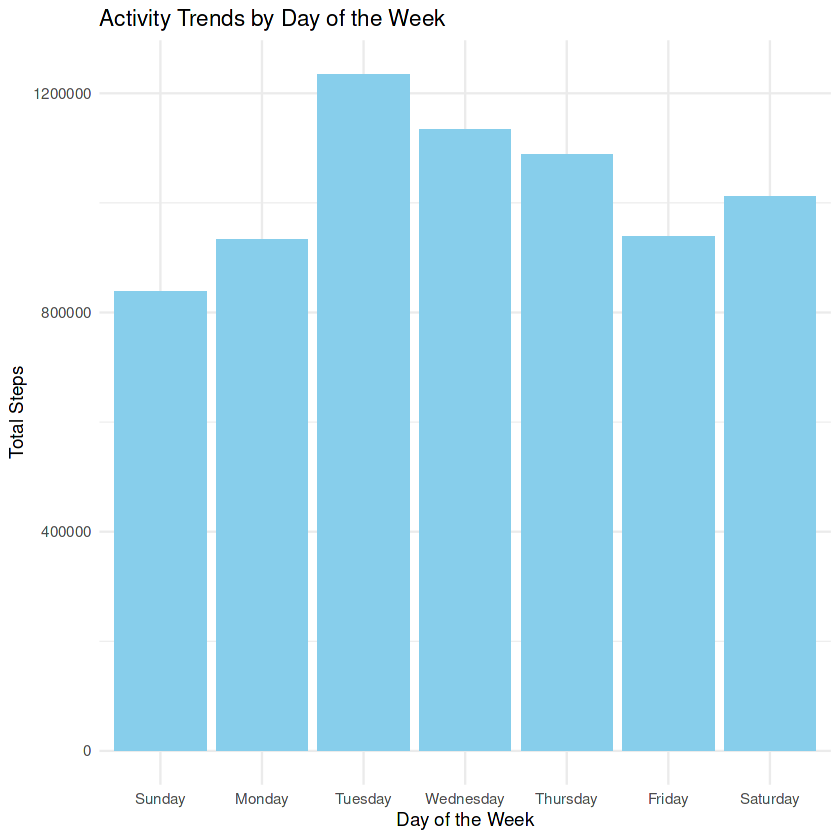

In [19]:
# Bar plot for activity trends by day of the week

activity_by_day$day_of_week <- factor(activity_by_day$day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

ggplot(activity_by_day, aes(x = day_of_week, y = total_steps)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Activity Trends by Day of the Week",
       x = "Day of the Week",
       y = "Total Steps") +
  theme_minimal()

For the second graph we will still use a bar plot illustrating activity trends by numerical day of the week. With total distance on the y-axis and numerical day of the week on the x-axis. The bars will represent the total distance covered each day, filled with a light green color.

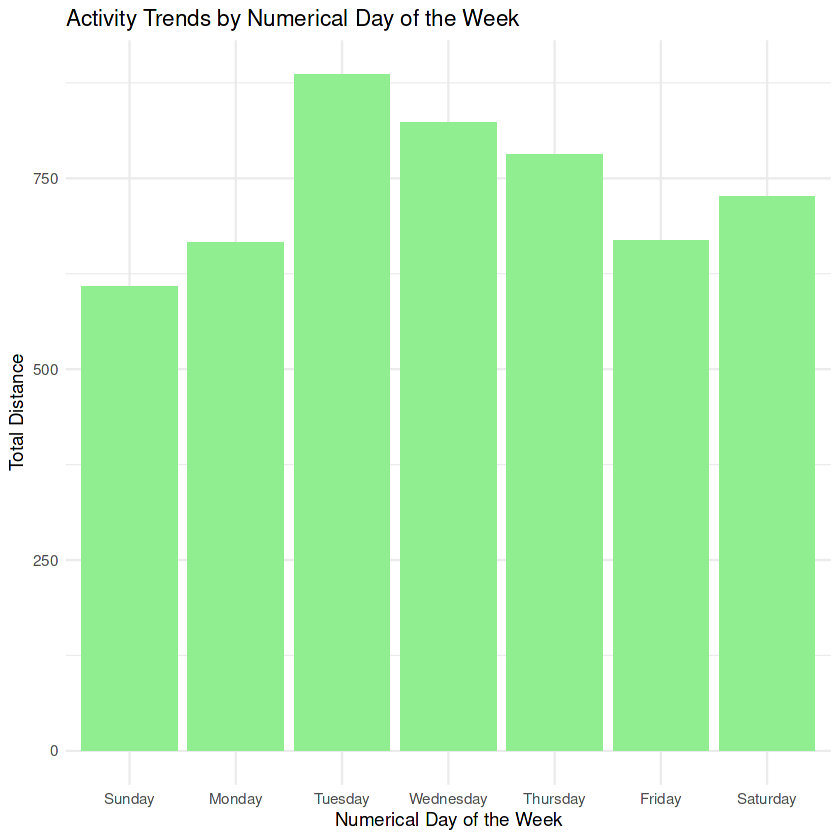

In [20]:
# Bar plot for activity trends by numerical day of the week

day_labels <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

ggplot(activity_by_numeric_day, aes(x = factor(n_day_of_week, levels = 1:7), y = total_distance)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Activity Trends by Numerical Day of the Week",
       x = "Numerical Day of the Week",
       y = "Total Distance") +
  scale_x_discrete(labels = day_labels) +  # Specify x-axis labels
  theme_minimal()

This one istead will use a line plot to show the average activity metrics by day of the week. With the day of the week on the x-axis and average values for steps, distance, minutes, and calories on the y-axis. Each metric is represented by a different colored line.

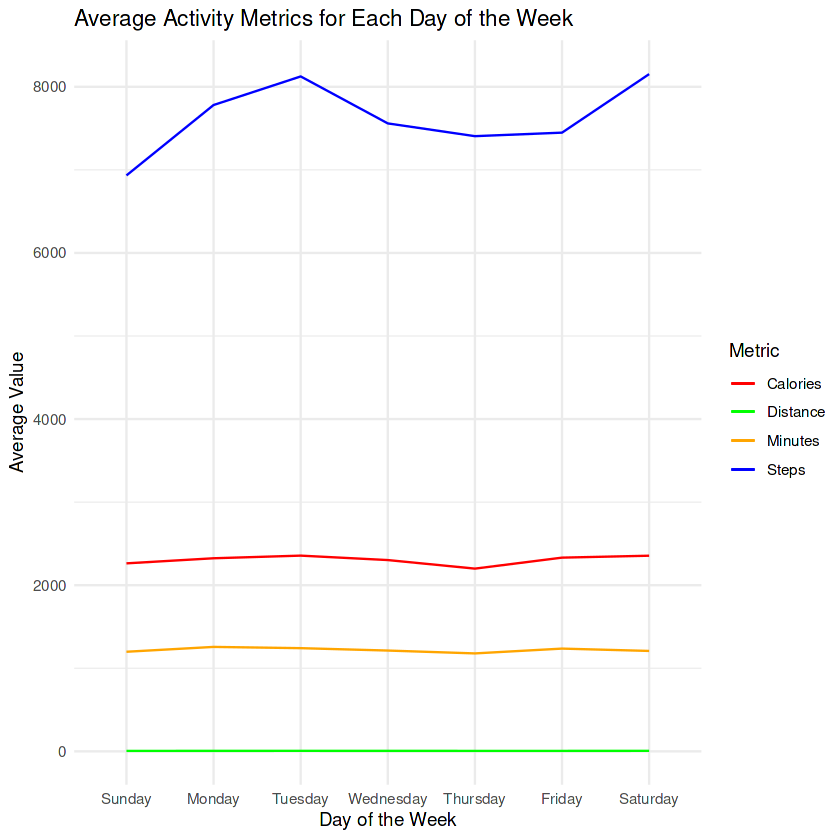

In [21]:
# Line plot for average activity metrics by day of the week

day_labels <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

ggplot(avg_activity_by_day, aes(x = factor(day_of_week, levels = day_labels))) +
  geom_line(aes(y = avg_steps, color = "Steps", group = 1)) +
  geom_line(aes(y = avg_distance, color = "Distance", group = 1)) +
  geom_line(aes(y = avg_minutes, color = "Minutes", group = 1)) +
  geom_line(aes(y = avg_calories, color = "Calories", group = 1)) +
  labs(title = "Average Activity Metrics for Each Day of the Week",
       x = "Day of the Week",
       y = "Average Value",
       color = "Metric") +
  scale_color_manual(values = c("Steps" = "blue", "Distance" = "green", "Minutes" = "orange", "Calories" = "red")) +
  theme_minimal()

Finally, we will generate a line plot illustrating average activity metrics by numerical day of the week. With the numerical day of the week on the x-axis and average values for steps, distance, minutes, and calories on the y-axis. Each metric is represented by a different colored line. 

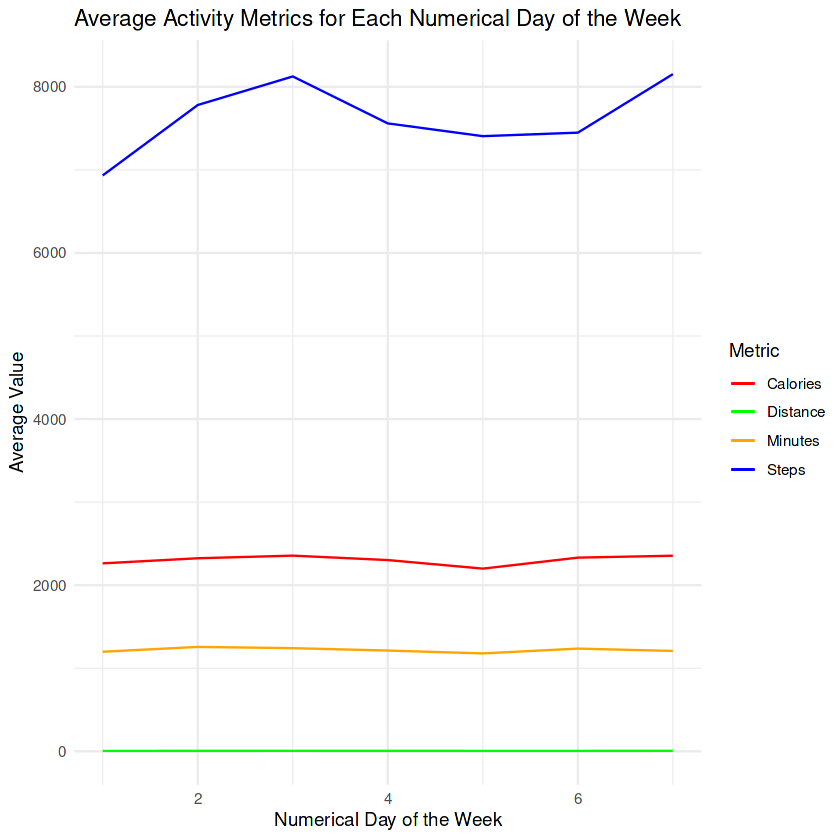

In [22]:
# Line plot for average activity metrics by numerical day of the week
ggplot(avg_activity_by_numeric_day, aes(x = n_day_of_week)) +
  geom_line(aes(y = avg_steps, color = "Steps")) +
  geom_line(aes(y = avg_distance, color = "Distance")) +
  geom_line(aes(y = avg_minutes, color = "Minutes")) +
  geom_line(aes(y = avg_calories, color = "Calories")) +
  labs(title = "Average Activity Metrics for Each Numerical Day of the Week",
       x = "Numerical Day of the Week",
       y = "Average Value",
       color = "Metric") +
  scale_color_manual(values = c("Steps" = "blue", "Distance" = "green", "Minutes" = "orange", "Calories" = "red")) +
  theme_minimal()

# Sharing Insight

In essence, the analysis highlights the significance of understanding patterns in physical activity for the design and enhancement of wearable fitness technologies. Leveraging these insights allows companies to effectively support users in achieving their health and wellness objectives while promoting sustained engagement with their products and services.

The observed differences in activity levels between weekdays and weekends are notable. On average, weekdays, particularly Wednesday and Thursday, exhibit higher total steps and distances covered compared to Saturdays and Sundays. This discrepancy suggests that individuals tend to engage in more physical activity during the workweek, potentially influenced by structured routines and commitments.

Furthermore, a consistent trend emerges when examining activity metrics. Mid-week days consistently demonstrate higher average values across steps, distance, minutes, and calories burned, indicating a probable correlation between weekday routines and increased physical activity. Conversely, weekends display lower average values across these metrics, implying a behavioral shift during leisure days.

These findings hold significant implications, particularly for companies operating in the wearable technology and fitness tracking industry, such as Bellabeat. Understanding these variations in user behavior enables companies to tailor marketing strategies and product features to better align with user preferences and routines. For instance, developing targeted features or incentives to encourage weekend activity or address barriers to engagement during leisure days could enhance user satisfaction and product adoption.

In summary, the insights derived from this analysis provide valuable guidance for companies like Bellabeat, enabling them to optimize their offerings to meet the diverse needs and behaviors of their user base, ultimately fostering greater engagement and loyalty.